In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['fashionmnist', 'imagem-test']


In [4]:
train_df = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test_df = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [5]:
train_data = train_df.get_values()
test_data = test_df.get_values()

In [6]:
train_imgs = train_data[:,1:]
train_labels = train_data[:,0]

test_imgs = test_data[:,1:]
test_labels = test_data[:,0]

In [7]:
train_imgs.shape, train_labels.shape

((60000, 784), (60000,))

In [8]:
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
test_imgs = test_imgs.reshape((10000, 28, 28, 1))

In [9]:
from __future__ import division

In [10]:
train_imgs = train_imgs / 255
test_imgs = test_imgs / 255

In [11]:
train_imgs.shape

(60000, 28, 28, 1)

In [12]:
from keras.utils import to_categorical

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

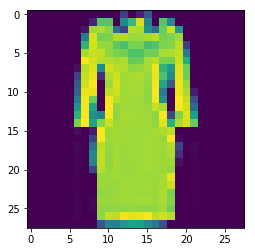

In [15]:
plt.imshow(train_imgs[4,:,:,0])

<h2>Construindo a rede</h2>

In [16]:
from keras.models import *
from keras.layers import *

In [17]:
input_node = Input(shape=(28, 28, 1))

conv1 = Conv2D(32, 
               (3, 3), 
               strides=1, 
               padding='same', 
               activation='relu')(input_node)
pool1 = MaxPooling2D((2, 2), strides=(2, 2))(conv1)

conv2 = Conv2D(64, 
               (3, 3), 
               strides=1, 
               padding='same', 
               activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2), strides=(2, 2))(conv2)

conv3 = Conv2D(128, 
               (3, 3), 
               strides=1, 
               padding='same', 
               activation='relu')(pool2)
pool3 = MaxPooling2D((2, 2), 
                     strides=(2, 2),
                     padding='same')(conv3)
flat = Flatten()(pool3)
out = Dense(10, activation='softmax')(flat)

model = Model(input_node, out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
__________

In [18]:
# model.load_weights('logs/')

In [19]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
from keras.callbacks import *

folder = 'logs/'
if not os.path.isdir(folder):
    os.makedirs(folder)

model_checkpoint = ModelCheckpoint(monitor='val_loss',
                                   filepath=folder+'model-{epoch:2d}-{loss:2.4f}-{acc:.2f}-{val_loss:.4f}-{val_acc:.2f}.hdf5',
                                   verbose=1,
                                   save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=3)

callbacks = [model_checkpoint, early_stop]

In [21]:
model.fit(train_imgs, train_labels, epochs=20, 
          validation_data=(test_imgs, test_labels),
          callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 420us/step - loss: 0.4262 - acc: 0.8456 - val_loss: 0.3500 - val_acc: 0.8751

Epoch 00001: val_loss improved from inf to 0.35000, saving model to logs/model- 1-0.4262-0.85-0.3500-0.88.hdf5
Epoch 2/20
60000/60000 [==============================] - 20s 338us/step - loss: 0.2781 - acc: 0.8991 - val_loss: 0.2697 - val_acc: 0.8990

Epoch 00002: val_loss improved from 0.35000 to 0.26971, saving model to logs/model- 2-0.2781-0.90-0.2697-0.90.hdf5
Epoch 3/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.2343 - acc: 0.9150 - val_loss: 0.2519 - val_acc: 0.9089

Epoch 00003: val_loss improved from 0.26971 to 0.25191, saving model to logs/model- 3-0.2343-0.91-0.2519-0.91.hdf5
Epoch 4/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.2043 - acc: 0.9265 - val_loss: 0.2139 - val_acc: 0.9230

Epoch 00004: val_loss improved from 0.25191 to 0.

<h2>Testando Imagem Real</h2>

In [23]:
import cv2

In [24]:
test_img = cv2.imread('../input/imagem-test/1db78fa09e5493a7091e98900fa22f4b-product.jpg', 0)

In [27]:
test_img = cv2.resize(test_img, (28,28))

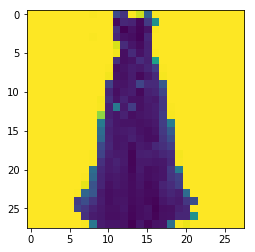

In [28]:
plt.imshow(test_img)

In [29]:
test_img = test_img.reshape((28, 28, 1))
test_img = np.expand_dims(test_img, 0)

In [34]:
test_img = test_img / 255

In [37]:
np.round(model.predict(test_img), 3)

array([[0.017, 0.   , 0.   , 0.   , 0.   , 0.   , 0.523, 0.   , 0.458,
        0.001]], dtype=float32)